##### Importing Libraries

In [114]:
%reset -f

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt 

print('Libraries Imported')
%whos

Libraries Imported
Variable        Type      Data/Info
-----------------------------------
Axes3D          type      <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
LinearLocator   type      <class 'matplotlib.ticker.LinearLocator'>
cm              module    <module 'matplotlib.cm' f<...>ckages/matplotlib/cm.py'>
np              module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt             module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [115]:
### Loading the Sphere coordinates and Intensity
x = np.load('a6-X.npy')
y = np.load('a6-Y.npy')
z = np.load('a6-Z.npy')
I = np.load('a6-I.npy')
C = np.reshape(I,(I.shape[0],I.shape[1],1)) # Converts 2d array I to 3d (required for plotting intensities as facecolors)
C = np.concatenate((C,C,C),axis=2)

Nx,Ny,Nz = x.shape[0],y.shape[0],z.shape[0]

In [116]:
# render a sphere (with coordinates X,Y,Z, and intensity C), 
# without (flag=0) or with (flag=1) surface normals (Nx,Ny,Nz)
def render_sphere(X,Y,Z,Nx,Ny,Nz,C,flag): 
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, facecolors=C) 
    ax.set_xlim([-1,1]); ax.set_ylim([-1,1]); ax.set_zlim([-1,1])
    ax.set_xlabel( "X" ); ax.set_ylabel( "Y" ); ax.set_zlabel( "Z" )
    ax.set_box_aspect((1,1,1))
    
    #surface normals
    if( flag ):
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                ax.quiver(X[i,j], Y[i,j], Z[i,j], Nx, Ny,Nz, color=[0,1,0])
                break
    
    plt.show()

In [117]:
## Computing the surface normal
Nx = np.zeros((x.shape[0],x.shape[1]))
Ny = np.zeros((y.shape[0],y.shape[1]))
Nz = np.zeros((z.shape[0],z.shape[1]))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        Nx[i,j] = x[i,j]/np.sqrt(x[i,j]**2+y[i,j]**2+z[i,j]**2)
        Ny[i,j] = y[i,j]/np.sqrt(x[i,j]**2+y[i,j]**2+z[i,j]**2)
        Nz[i,j] = z[i,j]/np.sqrt(x[i,j]**2+y[i,j]**2+z[i,j]**2)

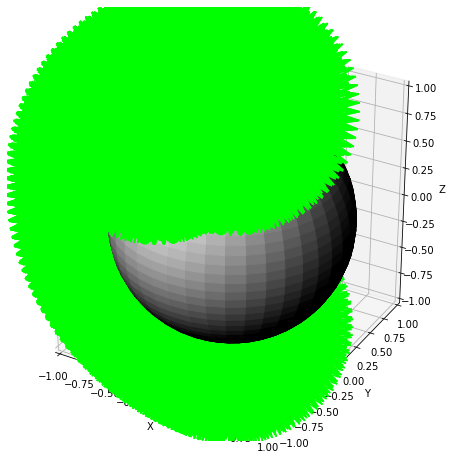

In [123]:
render_sphere(x,y,z,Nx,Ny,Nz,C,flag=True) 

In [119]:
## Computing the matrix N_ that will have the normal vector values for the overconstrained system 

check = I>0;
rows_N = np.sum(I>0); ##only those values in our system of linear equations that have intensity greater than 0
columns_N = 3; ##corressponding to the 3-d nature of the light source and the normal vector
N_ = []
I_ = []

for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if check[i,j] == True: #i.e., Illumination > 1 for this case
            N_.append([Nx[i,j],Ny[i,j],Nz[i,j]])
            I_.append(I[i,j])
Normals = np.array(N_)
Intensities = np.reshape(np.array(I_),(rows_N,1))

print(f"The number of rows for our overconstrained system are: {rows_N}")
print(f"The number of columns for the normal matrix is: {columns_N} which corressponds to a light source in 3d")
print(f"Now we have to compute the least squares for the equation Normals*ls = I")

The number of rows for our overconstrained system are: 839
The number of columns for the normal matrix is: 3 which corressponds to a light source in 3d
Now we have to compute the least squares for the equation Normals*ls = I


Least squares formula: 

ls = np.linalg.inv((Normals.T@Normals))@Normals.T@Intensities

In [120]:
### Computing Least Squares 

ls = np.linalg.inv(Normals.T@Normals)@Normals.T@Intensities

In [122]:
print(f"So based on the least square approximation, the 3-d direction is: \n {ls}")

So based on the least square approximation, the 3-d direction is: 
 [[ 0.00596716]
 [-0.70706699]
 [ 0.70705375]]
